# RED WINE QUALITY PREDICTION

In [371]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [372]:
# read CSV file
df = pd.read_csv('/content/winequality-red.csv')


In [373]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [374]:
df.shape

(1599, 12)

In [375]:
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [377]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


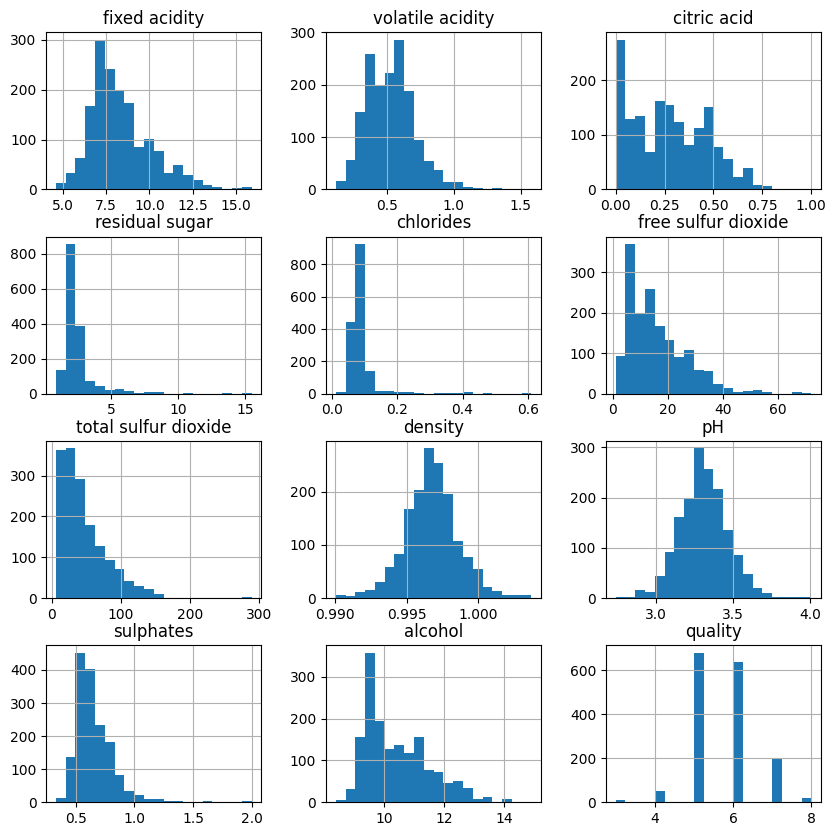

In [378]:

df.hist(bins=20, figsize=(10, 10))
plt.show()

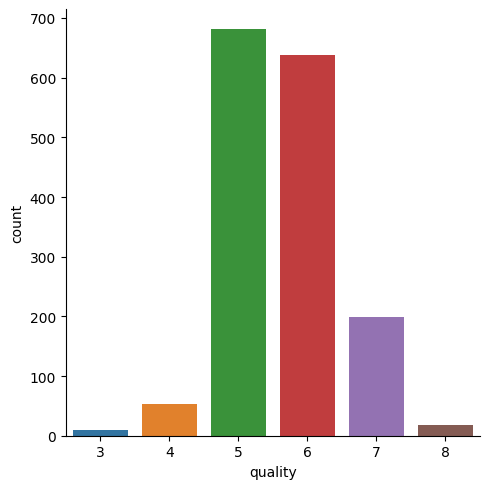

In [379]:
sns.catplot(x="quality", data=df, kind='count')

# display the plot
plt.show()

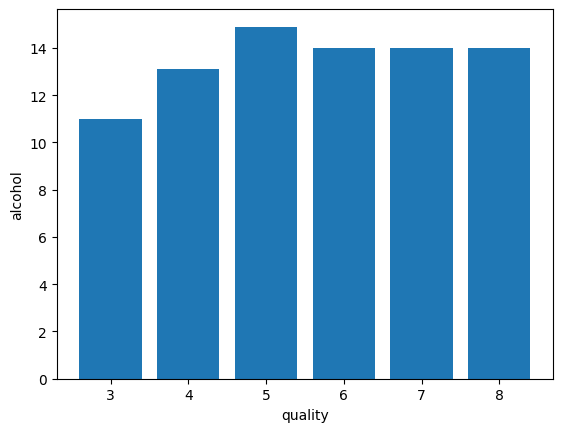

In [380]:

plt.bar(df['quality'], df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

<Axes: xlabel='quality', ylabel='citric acid'>

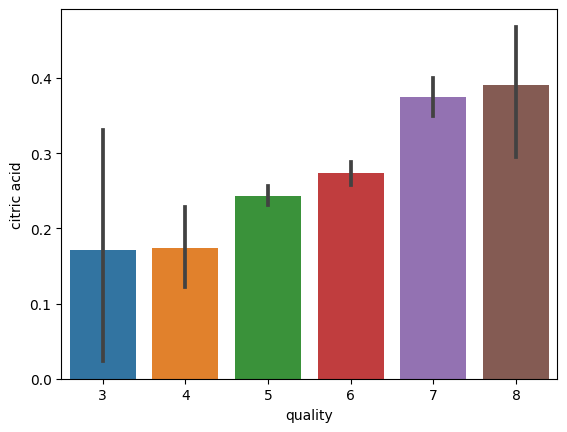

In [381]:
sns.barplot(x='quality',y='citric acid',data=df)

In [382]:
correlation = df.corr()

<Axes: >

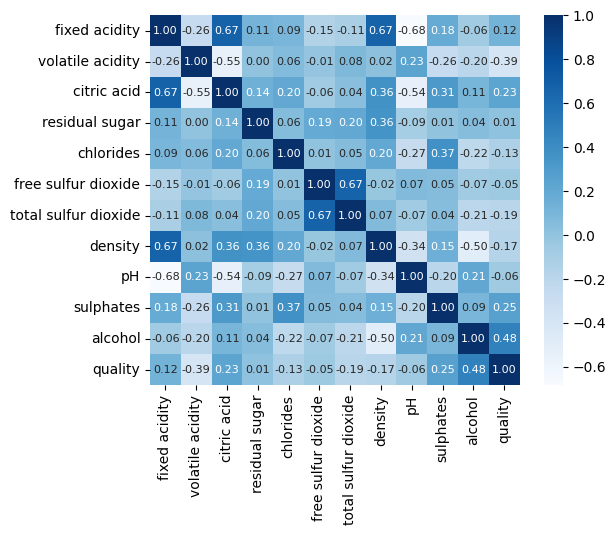

In [383]:
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws = {'size':8}, cmap='Blues')

In [384]:
#X = df.drop(['quality','total sulfur dioxide'],axis=1)

In [385]:
X = df.drop(['quality'],axis=1)

In [386]:
y = df['quality'].apply(lambda y_value: 1 if y_value>7 else 0)

In [387]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [388]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [389]:
X_train.shape, X_test.shape

((1119, 11), (480, 11))

Normalization

In [390]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [391]:
#norm = MinMaxScaler()
norm=StandardScaler()
new_X_train = norm.fit_transform(X_train)
new_X_test = norm.transform(X_test)

In [392]:
from sklearn.metrics import accuracy_score
odels = [LogisticRegression(), XGBClassifier(random_state=1), SVC(kernel='rbf'),KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2) ]

for i in range(4):
    models[i].fit(new_X_train, y_train)

    print(f'{models[i]} : ')
    print('Training Accuracy : ', accuracy_score(y_train, models[i].predict(new_X_train)))
    print('Validation Accuracy : ',accuracy_score(
        y_test, models[i].predict(new_X_test)))
    print()

LogisticRegression() : 
Training Accuracy :  0.9892761394101877
Validation Accuracy :  0.9875

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  0.9854166666666667

SVC() : 
Training Accuracy :  0.9892761394101877
Validation Accuracy :  0.9875

KNeig

In [397]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(new_X_train, y_train)
y_pred2 = model2.predict(new_X_test)

from sklearn.metrics import accuracy_score
print("Training accurancy Score:",accuracy_score(y_train,model2.predict(new_X_train)))
print("Validation accuracy Score:",accuracy_score(y_test,y_pred2))

# Display the classification report
print('Classification Report:')
print(classification_report(y_test,y_pred2))
print()


Training accurancy Score: 1.0
Validation accuracy Score: 0.9875
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       474
           1       0.50      0.17      0.25         6

    accuracy                           0.99       480
   macro avg       0.74      0.58      0.62       480
weighted avg       0.98      0.99      0.98       480




In [394]:
import xgboost as xgb
model5 = xgb.XGBClassifier(random_state=1)
model5.fit(new_X_train, y_train)
y_pred5 = model5.predict(new_X_test)

from sklearn.metrics import accuracy_score
print("Training accurancy Score:",accuracy_score(y_train,model5.predict(new_X_train)))
print("Validation accuracy Score:",accuracy_score(y_test,y_pred5))

Training accurancy Score: 1.0
Validation accuracy Score: 0.9854166666666667


In [395]:
predicted_df = {'predicted_values': y_pred2, 'original_values': y_test}
#creating new dataframe
pd.DataFrame(predicted_df).head(30)

,predicted_values,original_values
803,0,0
124,0,0
350,0,0
682,0,0
1326,0,0
976,0,0
1493,0,0
706,0,0
613,0,0
1587,0,0


Hence I will use Random Forest algorithms for training my model.

In [396]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_classification_model.pkl', 'wb')

# dump information to that file
pickle.dump(rnd, file)
#we use a pickle file to store the data in a byte stream format